# BT4012 Project

## Feature Details

**Transaction ID:** A unique identifier for each transaction.

**Customer ID:** A unique identifier for each customer.

**Transaction Amount:** The total amount of money exchanged in the transaction.

**Transaction Date:** The date and time when the transaction took place.

**Payment Method:** The method used to complete the transaction (e.g., credit card, PayPal, etc.).

**Product Category:** The category of the product involved in the transaction.

**Quantity:** The number of products involved in the transaction.

**Customer Age:** The age of the customer making the transaction.

**Customer Location:** The geographical location of the customer.

**Device Used:** The type of device used to make the transaction (e.g., mobile, desktop).

**IP Address:** The IP address of the device used for the transaction.

**Shipping Address:** The address where the product was shipped.

**Billing Address:** The address associated with the payment method.

**Is Fraudulent:** A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).

**Account Age Days:** The age of the customer's account in days at the time of the transaction.

**Transaction Hour:** The hour of the day when the transaction occurred.


# Setup Environment

In [78]:
# from google.colab import drive
# drive.mount('/content/drive')

In [79]:
# # Change your path accordingly
# %cd 'drive/My Drive/BT4012 Project'

## Load Imports

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from dateutil.relativedelta import relativedelta

preprocessed_data_filepath = "./Preprocessed data/"

## Load Data

In [81]:
df = pd.read_csv(preprocessed_data_filepath + "Fraudulent_E-Commerce_Transaction_Data.csv")

# Exploratory Data Analysis

In [82]:
# Display column names
print(df.columns.tolist())

['Transaction ID', 'Customer ID', 'Transaction Amount', 'Transaction Date', 'Payment Method', 'Product Category', 'Quantity', 'Customer Age', 'Customer Location', 'Device Used', 'IP Address', 'Shipping Address', 'Billing Address', 'Is Fraudulent', 'Account Age Days', 'Transaction Hour']


In [83]:
# Display the first few rows
df.head(10)

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
5,5da506fe-d4df-474a-b773-146333f06cfe,03033baf-2bcc-4608-b5b8-9c86976f4948,345.27,2024-02-22 13:49:27,PayPal,toys & games,1,9,Johnsonmouth,desktop,158.48.161.135,"PSC 3832, Box 5265\nAPO AE 85694","PSC 3832, Box 5265\nAPO AE 85694",0,251,13
6,47b35c5d-d4c9-4a7d-a354-cd41596abf67,6a5305a3-b47c-4bdb-91d7-3bf126530e01,53.69,2024-03-21 13:42:10,debit card,toys & games,3,41,New Brendamouth,mobile,93.54.173.138,"272 Tammy Isle Apt. 969\nNorth Michaelmouth, M...","272 Tammy Isle Apt. 969\nNorth Michaelmouth, M...",0,138,13
7,bf3db41c-25a9-4e6d-b87f-13e5fabe35dd,7300dcf3-df6f-439f-ba13-a98f18b972f3,680.17,2024-01-18 23:25:10,debit card,electronics,5,39,South Tracy,tablet,61.52.160.51,30470 Amanda Causeway Suite 446\nLake Ashleyla...,30470 Amanda Causeway Suite 446\nLake Ashleyla...,0,36,23
8,8ec806af-c367-4dd0-8218-25d3c8c7a346,25c48d47-879f-49b3-b0cc-a7393c28f8af,126.50,2024-02-12 04:01:09,debit card,home & garden,4,35,West Henry,mobile,6.59.118.143,"179 Amy Roads\nRyanland, OH 38054","179 Amy Roads\nRyanland, OH 38054",0,188,4
9,3b51c8cd-e0d7-48ba-894f-8f77b2cf2f43,41803857-0031-499c-bcaf-bca4e4ef4620,47.18,2024-04-06 22:52:33,bank transfer,toys & games,4,19,Taylorside,mobile,17.185.69.10,"34828 Ronald Oval Suite 620\nNew Samuelmouth, ...","34828 Ronald Oval Suite 620\nNew Samuelmouth, ...",0,245,22


In [84]:
# Check for missing/null values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

In [85]:
print(f"""Earliest Transaction: {df['Transaction Date'].min()}""")
print(f"""Latest Transaction: {df['Transaction Date'].max()}""")
difference = relativedelta(pd.to_datetime(df['Transaction Date'].max()),pd.to_datetime(df['Transaction Date'].min()))
print(f"Duration: {difference.months} months and {difference.days} days")

Earliest Transaction: 2024-01-01 00:01:19
Latest Transaction: 2024-04-07 08:54:03
Duration: 3 months and 6 days


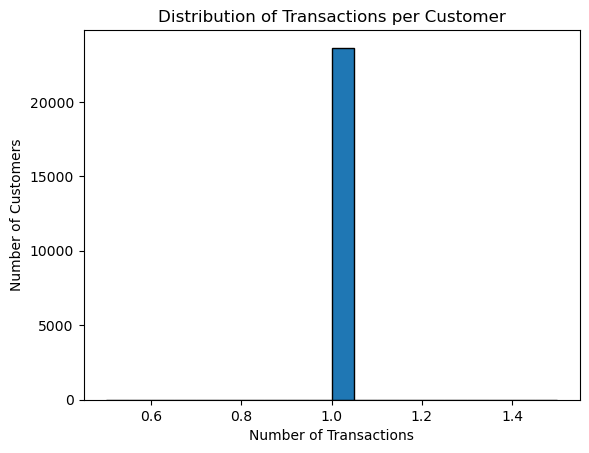

count    23634.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Transaction Count, dtype: float64

In [86]:
# Group by customer ID to see number of transactions per customer ID
customer_transaction_counts = df.groupby('Customer ID').size().reset_index(name='Transaction Count')
customer_transaction_counts = customer_transaction_counts.sort_values(by='Transaction Count', ascending=False)
plt.hist(customer_transaction_counts['Transaction Count'], bins=20, edgecolor='k')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.title('Distribution of Transactions per Customer')
plt.show()
single_transaction_customers = customer_transaction_counts[customer_transaction_counts['Transaction Count'] == 1]
customer_transaction_counts['Transaction Count'].describe()

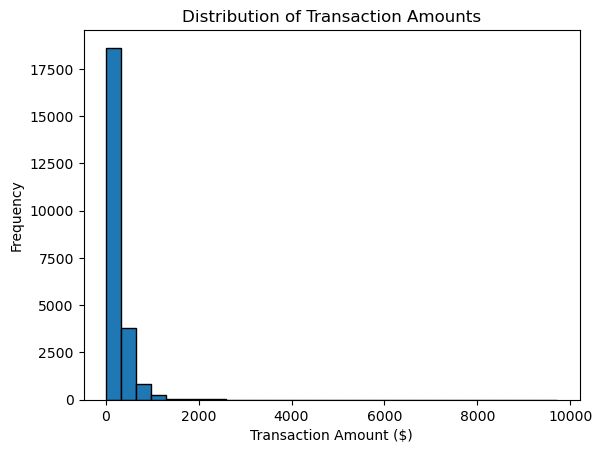

In [87]:
# Distribution of Transaction Amounts
plt.hist(df['Transaction Amount'], bins=30, edgecolor='k')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

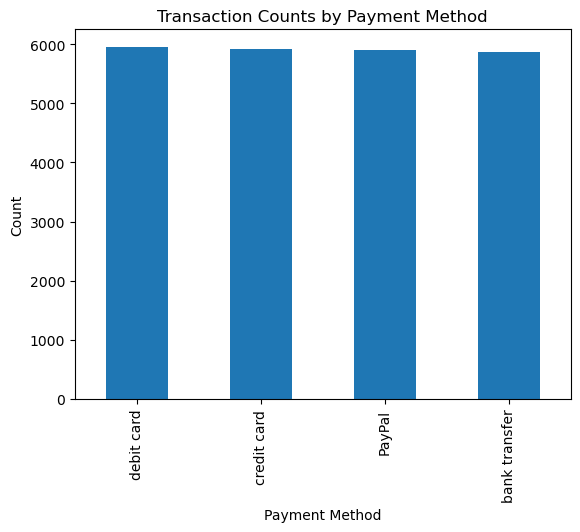

In [88]:
# Counting plot for Payment Method
df['Payment Method'].value_counts().plot(kind='bar')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Transaction Counts by Payment Method')
plt.show()

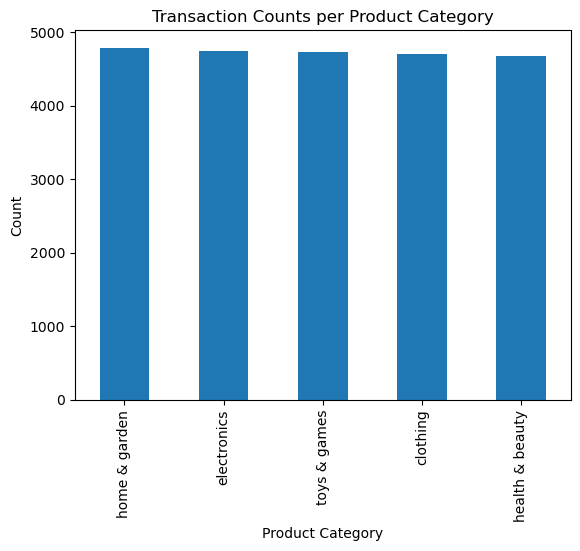

In [89]:
# Counting plot for Product Category
df['Product Category'].value_counts().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Transaction Counts per Product Category')
plt.show()

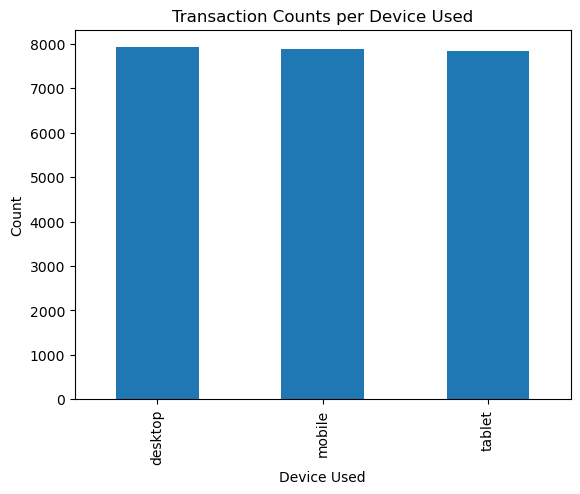

In [90]:
df['Device Used'].value_counts().plot(kind='bar')
plt.xlabel('Device Used')
plt.ylabel('Count')
plt.title('Transaction Counts per Device Used')
plt.show()

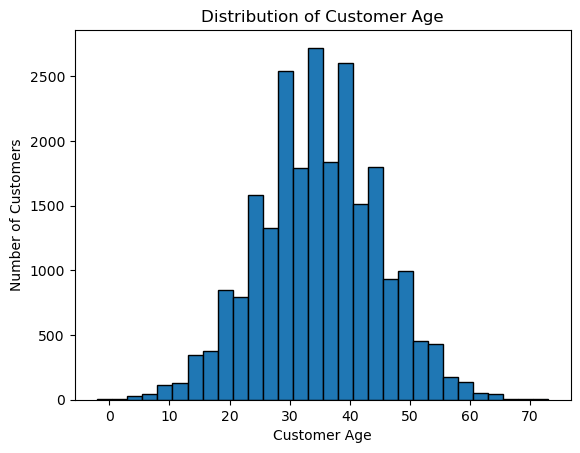

In [91]:
# Distribution of Transaction Amounts
plt.hist(df['Customer Age'], bins=30, edgecolor='k')
plt.xlabel('Customer Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Age')
plt.show()

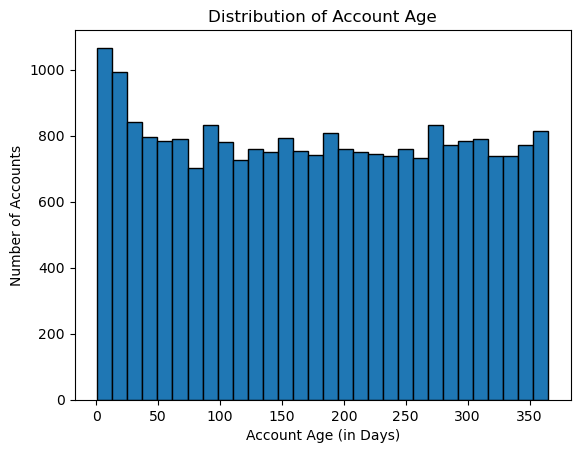

In [92]:
# Distribution of Account Age
plt.hist(df['Account Age Days'], bins=30, edgecolor='k')
plt.xlabel('Account Age (in Days)')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Account Age')
plt.show()

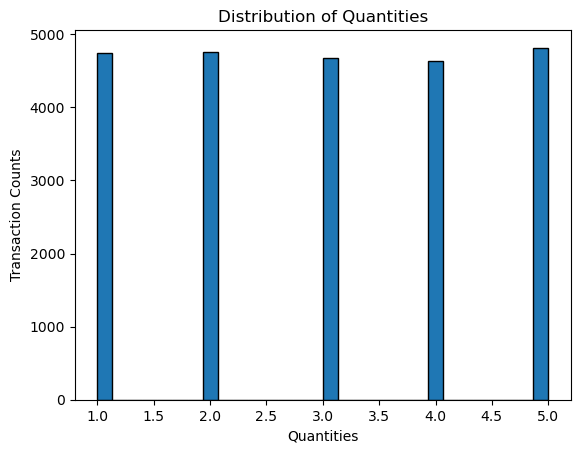

In [93]:
# Distribution of Quantities
plt.hist(df['Quantity'], bins=30, edgecolor='k')
plt.xlabel('Quantities')
plt.ylabel('Transaction Counts')
plt.title('Distribution of Quantities')
plt.show()

Based on the distribution of the `Quantity` column, we find it suitable to ordinally encode the column.

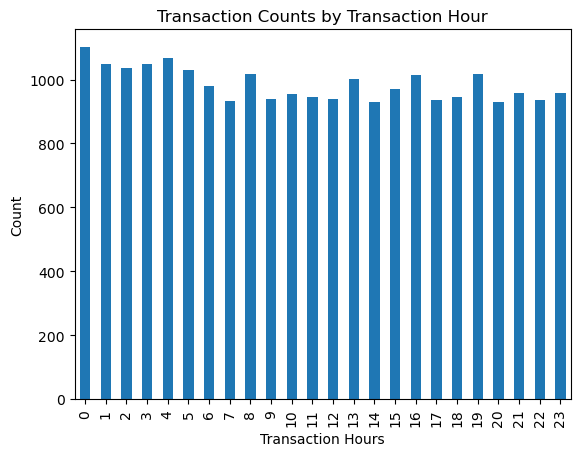

In [94]:
# Counting plot for Transaction Hour
df['Transaction Hour'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Transaction Hours')
plt.ylabel('Count')
plt.title('Transaction Counts by Transaction Hour')
plt.show()

In [95]:
numerical_columns = ['Quantity', 'Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour']
df[numerical_columns].describe()

,Quantity,Transaction Amount,Customer Age,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,3.000550,229.367099,34.560210,178.660531,11.266015
std,1.419663,282.046669,10.009471,107.388682,6.980659
min,1.000000,10.000000,-2.000000,1.000000,0.000000
25%,2.000000,69.070000,28.000000,84.000000,5.000000
50%,3.000000,151.415000,35.000000,178.000000,11.000000
75%,4.000000,296.127500,41.000000,272.000000,17.000000
max,5.000000,9716.500000,73.000000,365.000000,23.000000


In [96]:
# Check for duplicate Shipping Addresses
duplicate_shipping = df['Shipping Address'].value_counts()
repeated_shipping = duplicate_shipping[duplicate_shipping > 1]

# Check for duplicate Billing Addresses
duplicate_billing = df['Billing Address'].value_counts()
repeated_billing = duplicate_billing[duplicate_billing > 1]

# Check for duplicate IP Addresses
duplicate_ip = df['IP Address'].value_counts()
repeated_ip = duplicate_ip[duplicate_ip > 1]

# Print results
print("Repeated Shipping Addresses:\n", repeated_shipping)
print("Repeated Billing Addresses:\n", repeated_billing)
print("Repeated IP Addresses:\n", repeated_ip)

Repeated Shipping Addresses:
 Series([], Name: count, dtype: int64)
Repeated Billing Addresses:
 Series([], Name: count, dtype: int64)
Repeated IP Addresses:
 Series([], Name: count, dtype: int64)


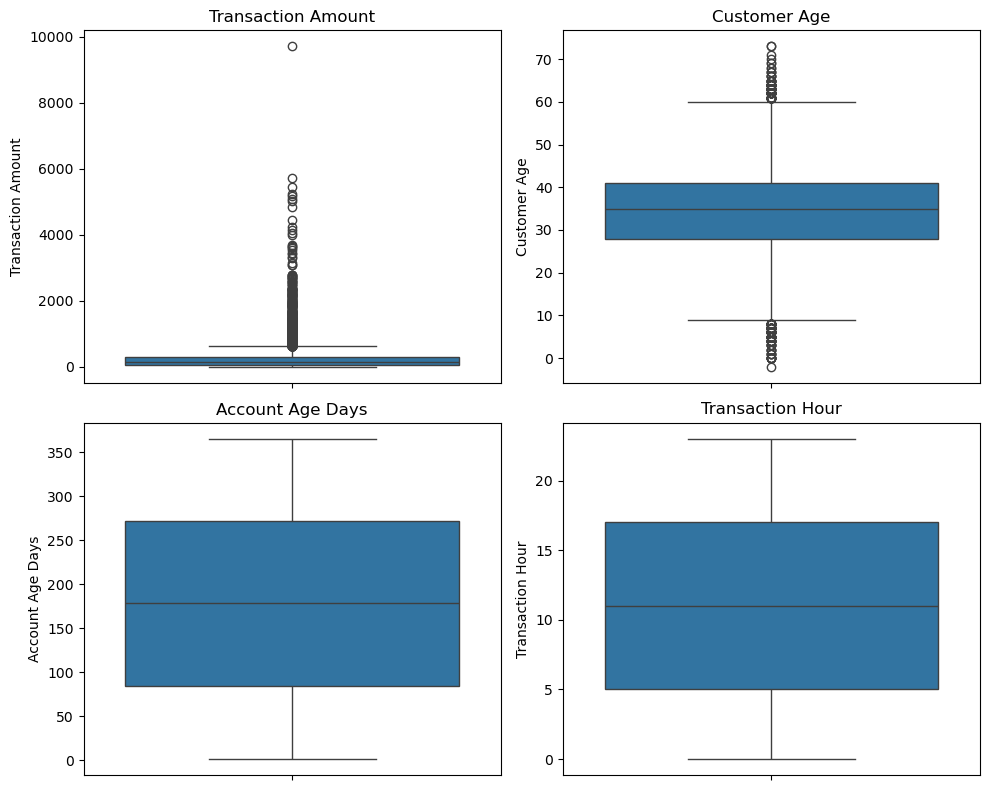

In [97]:
# prompt: show multiple box plots when provided with a list of columns

# Assuming you want box plots for the 'numerical_columns' you defined earlier
numerical_columns = ['Transaction Amount', 'Customer Age', 'Account Age Days', 'Transaction Hour']

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

for i, column in enumerate(numerical_columns):
  plt.subplot(2, 2, i + 1)  # Create subplots for each column
  sns.boxplot(y=df[column])
  plt.title(column)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

In [98]:
# Calculate the count of fraudulent and non-fraudulent transactions
fraud_counts = df['Is Fraudulent'].value_counts()

# Calculate the percentage of each type of transaction
fraud_percentages = df['Is Fraudulent'].value_counts(normalize=True) * 100

# Combine both into a DataFrame for better readability
fraud_summary = pd.DataFrame({'Count': fraud_counts, 'Percentage': fraud_percentages})

# Display the summary
print(fraud_summary)

               Count  Percentage
Is Fraudulent                   
0              22412   94.829483
1               1222    5.170517


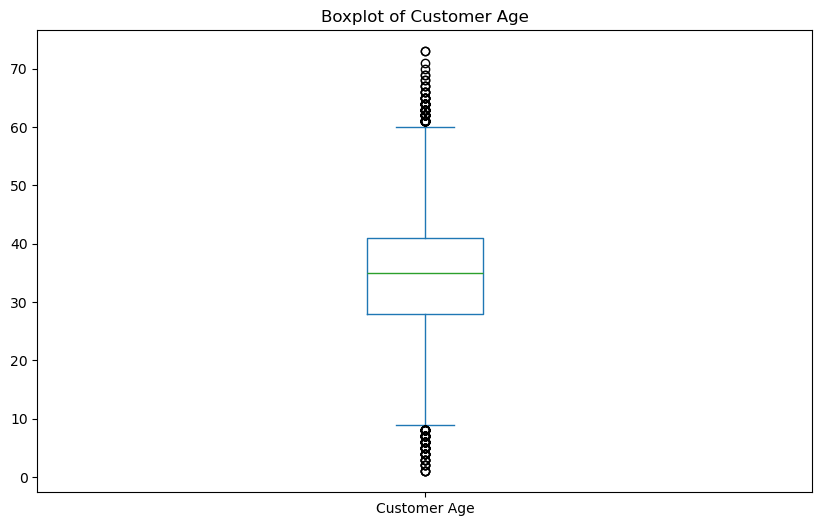

count    23634.000000
mean        34.560210
std         10.009471
min         -2.000000
25%         28.000000
50%         35.000000
75%         41.000000
max         73.000000
Name: Customer Age, dtype: float64


In [99]:
# Boxplot to have a closer look at the outliers in the Customer Age column
plt.figure(figsize=(10, 6))
df.loc[df['Customer Age']>0, 'Customer Age'].plot(kind='box')
plt.title('Boxplot of Customer Age')
plt.show()

age_summary = df['Customer Age'].describe()
print(age_summary)

In [100]:
# Define the new age bins and labels
bins = [-10, 0, 10, 20, 30, 40, 50, 60, 70,80]
labels = ['-10 to 0', '1 - 10', '11 - 20', '21 - 30', '31 - 40', 
          '41 - 50', '51 - 60', '61 - 70', '71 - 80']

# Create a new column for age groups
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate the range of ages (min and max)
age_range_by_group = df.groupby('Age Group', observed=False)['Customer Age'].agg(['min', 'max', 'count'])

# Display the result
print(age_range_by_group)

           min  max  count
Age Group                 
-10 to 0    -2   -2      1
1 - 10       0    9    151
11 - 20     10   19   1437
21 - 30     20   29   5664
31 - 40     30   39   9023
41 - 50     40   49   5761
51 - 60     50   59   1444
61 - 70     60   69    149
71 - 80     70   73      4


In [101]:
# Group by 'Age Group' and calculate the average transaction amount, quantity, fraudulent percentage and number of transactions per payment method
age_group_stats = df.groupby('Age Group').agg({
    'Transaction Amount': 'mean',
    'Quantity': 'mean',
    'Is Fraudulent': 'mean'  # Calculate the mean of 'Is Fraudulent' to get the percentage
})

age_group_stats['Total Transactions'] = df.groupby('Age Group').size()

# Rename the columns for better readability
age_group_stats = age_group_stats.rename(columns={
    'Transaction Amount': 'Average Transaction Amount',
    'Quantity': 'Average Quantity',
    'Is Fraudulent': 'Fraudulent Percentage'
})

age_group_stats

/var/folders/0p/py3q5_c526d7j6_m7dydm6qm0000gp/T/ipykernel_80145/146452724.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('Age Group').agg({
/var/folders/0p/py3q5_c526d7j6_m7dydm6qm0000gp/T/ipykernel_80145/146452724.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats['Total Transactions'] = df.groupby('Age Group').size()


,Average Transaction Amount,Average Quantity,Fraudulent Percentage,Total Transactions
Age Group,,,,
-10 to 0,190.760000,3.000000,0.000000,1
1 - 10,246.947285,2.894040,0.052980,151
11 - 20,232.744983,3.035491,0.045233,1437
21 - 30,228.102246,2.993997,0.054379,5664
31 - 40,232.053739,3.000554,0.049429,9023
41 - 50,225.933963,3.000694,0.053637,5761
51 - 60,225.857396,3.001385,0.052632,1444
61 - 70,223.217450,3.000000,0.060403,149
71 - 80,533.155000,3.250000,0.250000,4


In [102]:
# Group by 'Payment Method' and calculate the average transaction amount, quantity, fraudulent percentage and number of transactions per payment method
payment_method_stats = df.groupby('Payment Method').agg({
    'Transaction Amount': 'mean',
    'Quantity': 'mean',
    'Is Fraudulent': 'mean'  # Calculate the mean of 'Is Fraudulent' to get the percentage
})

payment_method_stats['Total Transactions'] = df.groupby('Payment Method').size()

# Rename the columns for better readability
payment_method_stats = payment_method_stats.rename(columns={
    'Transaction Amount': 'Average Transaction Amount',
    'Quantity': 'Average Quantity',
    'Is Fraudulent': 'Fraudulent Percentage'
})

payment_method_stats

,Average Transaction Amount,Average Quantity,Fraudulent Percentage,Total Transactions
Payment Method,,,,
PayPal,232.859739,3.001526,0.052551,5899
bank transfer,229.346338,3.010239,0.055631,5860
credit card,227.438727,2.992571,0.050819,5923
debit card,227.844975,2.997984,0.047883,5952


In [103]:
# Group by 'Product Category' and calculate the average transaction amount, quantity, fraudulent percentage and number of transactions per product category
category_stats = df.groupby('Product Category').agg({
    'Transaction Amount': 'mean',
    'Quantity': 'mean',
    'Is Fraudulent': 'mean'  # Calculate the mean of 'Is Fraudulent' to get the percentage
})

category_stats['Total Transactions'] = df.groupby('Product Category').size()

# Rename the columns for better readability
category_stats = category_stats.rename(columns={
    'Transaction Amount': 'Average Transaction Amount',
    'Quantity': 'Average Quantity',
    'Is Fraudulent': 'Fraudulent Percentage'
})

category_stats

,Average Transaction Amount,Average Quantity,Fraudulent Percentage,Total Transactions
Product Category,,,,
clothing,228.695465,2.981060,0.055331,4699
electronics,228.216740,3.058762,0.048231,4748
health & beauty,226.510871,2.960608,0.052237,4671
home & garden,234.907428,2.989553,0.053907,4786
toys & games,228.403744,3.012051,0.048837,4730


In [104]:
# Group by 'Device Used' and calculate the average transaction amount, quantity, fraudulent percentage and number of transactions per type of device used
device_stats = df.groupby('Device Used').agg({
    'Transaction Amount': 'mean',
    'Quantity': 'mean',
    'Is Fraudulent': 'mean'  # Calculate the mean of 'Is Fraudulent' to get the percentage
})

device_stats['Total Transactions'] = df.groupby('Device Used').size()

# Rename the columns for better readability
device_stats = device_stats.rename(columns={
    'Transaction Amount': 'Average Transaction Amount',
    'Quantity': 'Average Quantity',
    'Is Fraudulent': 'Fraudulent Percentage'
})

device_stats

,Average Transaction Amount,Average Quantity,Fraudulent Percentage,Total Transactions
Device Used,,,,
desktop,227.631241,3.016282,0.051243,7923
mobile,230.290759,2.994290,0.054435,7881
tablet,230.193898,2.990932,0.049425,7830


In [105]:
total_transactions_by_device = df.groupby('Device Used').size()

fraudulent_by_device = df[df['Is Fraudulent'] == 1].groupby('Device Used').size()

fraud_percentage_by_device = (fraudulent_by_device / total_transactions_by_device) * 100

fraud_analysis_by_device = pd.DataFrame({
    'Total Transactions': total_transactions_by_device,
    'Fraudulent Transactions': fraudulent_by_device,
    'Fraudulent Percentage (%)': fraud_percentage_by_device
})

print(fraud_analysis_by_device)

             Total Transactions  Fraudulent Transactions  \
Device Used                                                
desktop                    7923                      406   
mobile                     7881                      429   
tablet                     7830                      387   

             Fraudulent Percentage (%)  
Device Used                             
desktop                       5.124322  
mobile                        5.443472  
tablet                        4.942529  


<Axes: >

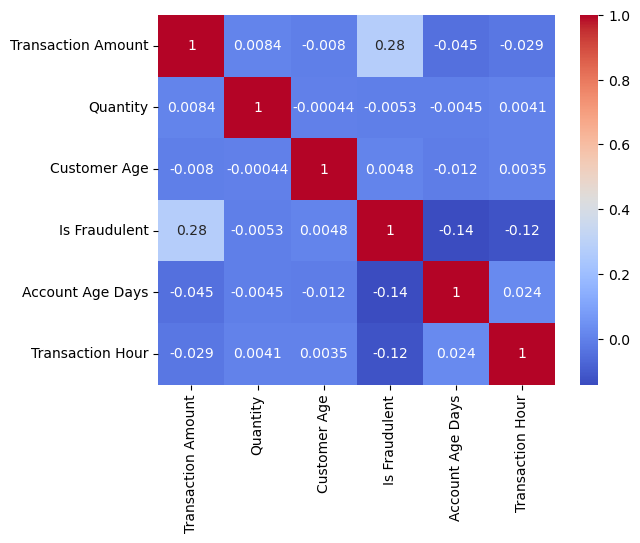

In [106]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_columns].corr()

# Create a correlation plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [107]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour,Age Group
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23,41 - 50
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0,31 - 40
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8,21 - 30
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20,41 - 50
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15,41 - 50


# Additional Features from IP Address


In [108]:
import time

# Assuming 'ip_address' is the column name containing the IP addresses
ip_addresses = df['IP Address'].tolist()

# Divide IP addresses into batches of 100
batch_size = 100
batches = [ip_addresses[i:i + batch_size] for i in range(0, len(ip_addresses), batch_size)]

# API URL
url = "http://ip-api.com/batch?fields=status,country,proxy,query"

# Function to send POST requests
def fetch_ip_data(batch):
    try:
        response = requests.post(url, json=batch, timeout=10)
        response.raise_for_status()  # Raise HTTPError for bad responses
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error during request: {e}")
        return []

# Dictionary to store the results for mapping
results_dict = {}

# Iterate through the batches and adhere to the rate limit
for i, batch in enumerate(batches):
    print(f"Processing batch {i + 1}/{len(batches)}...")
    result = fetch_ip_data(batch)
    for res in result:
        # Use the 'query' field from the response to match the IP
        if res.get("status") == "success":
            results_dict[res["query"]] = {
                "country": res.get("country"),
                "proxy": res.get("proxy"),
            }

    # Wait if we reach the request limit
    if (i + 1) % 15 == 0:
        print("Rate limit reached, sleeping for 90 seconds...")
        time.sleep(90)

# Create new columns in the dataframe for each field
df["IPCountry"] = df['IP Address'].map(lambda x: results_dict.get(x, {}).get("country"))
df["Proxy"] = df['IP Address'].map(lambda x: results_dict.get(x, {}).get("proxy"))

# Save the updated dataframe to a CSV file
df.to_csv(preprocessed_data_filepath + "updated_data.csv", index=False)

print("Data fetching complete. Updated dataframe saved to 'updated_data.csv'.")

Processing batch 1/237...
Processing batch 2/237...
Processing batch 3/237...
Processing batch 4/237...
Processing batch 5/237...
Processing batch 6/237...
Processing batch 7/237...
Processing batch 8/237...
Processing batch 9/237...
Processing batch 10/237...
Processing batch 11/237...
Processing batch 12/237...
Processing batch 13/237...
Processing batch 14/237...
Processing batch 15/237...
Error during request: 429 Client Error: Too Many Requests for url: http://ip-api.com/batch?fields=status,country,proxy,query
Rate limit reached, sleeping for 90 seconds...
Processing batch 16/237...
Processing batch 17/237...
Processing batch 18/237...
Processing batch 19/237...
Processing batch 20/237...
Processing batch 21/237...
Processing batch 22/237...
Processing batch 23/237...
Processing batch 24/237...
Processing batch 25/237...
Processing batch 26/237...
Processing batch 27/237...
Processing batch 28/237...
Processing batch 29/237...
Processing batch 30/237...
Rate limit reached, sleepin

In [109]:
print("Null count in new features:")
print("IPCountry: ", sum(df['IPCountry'].isnull()))
print("Proxy: ", sum(df['Proxy'].isnull()))

Null count in new features:
IPCountry:  202
Proxy:  202


There are some null values for IPCountry, as the IP addresses in the dataset originate from a private network. As such, the null values in IPCountry will later be imputed as `Unknown`.

# Feature Engineering

In [169]:
# Load new dataset
df = pd.read_csv(preprocessed_data_filepath + "updated_data.csv")

## Data Cleaning

In [170]:
# Impute missing values in the 'Country' column
df['IPCountry'] = df['IPCountry'].fillna('Unknown')
df['Proxy'] = df['Proxy'].fillna('Unknown')

In [171]:
# Remove negative and zero ages
df = df[df['Customer Age'] > 0]

## Transaction Amount Data Binning

In [172]:
min_transaction_amount = df['Transaction Amount'].min()
median_transaction_amount = df['Transaction Amount'].median()
mean_transaction_amount = df['Transaction Amount'].mean()
max_transaction_amount = df['Transaction Amount'].max()
bins = [min_transaction_amount, median_transaction_amount, mean_transaction_amount, max_transaction_amount]
labels = ['Low Value', 'Mid Value', 'High Value']
df['Transaction Values'] = pd.cut(df['Transaction Amount'], bins=bins, labels=labels, include_lowest=True)
label_mapping = {'Low Value': 1, 'Mid Value': 2, 'High Value': 3}
df['Transaction Values Ordinal'] = df['Transaction Values'].map(label_mapping)
df = df.drop(columns=['Transaction Values'])

## Time Related Features

In [173]:
# Time related features
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Transaction Day_of_week'] = df['Transaction Date'].dt.day_of_week
df['Transaction Day_of_month'] = df['Transaction Date'].dt.day

bins = [0, 6, 12, 18, 24]  # Bin edges (0-6: Night, 6-12: Morning, 12-18: Afternoon, 18-24: Evening)
labels = ['Night', 'Morning', 'Afternoon', 'Evening']  # Corresponding labels
# Bin the hours
df['Transaction Time_of_day'] = pd.cut(df['Transaction Hour'], bins=bins, labels=labels, right=False, include_lowest=True)

df['Transaction During_weekend'] = df['Transaction Day_of_week'].apply(lambda x: x in [6, 7])

bins = [0, 10, 20, 32]  # Bin edges (1-10, 11-20, 21-31)
labels = ['Start', 'Middle', 'End']  # Corresponding labels
# Bin the days of the month
df['Transaction Phase_of_month'] = pd.cut(df['Transaction Day_of_month'], bins=bins, labels=labels, right=False, include_lowest=True)


## Boolean Features

In [174]:
# Check shipping == billing address
df.loc[:, 'addressesMatch'] = (df['Shipping Address'] == df['Billing Address']).astype(int)

In [175]:
# Check if Shipping Address contains any PO Box indicators ("APO", "FPO", "DPO")
df['isPOBox'] = df['Shipping Address'].str.contains(r'\bAPO|FPO|DPO\b', case=False, regex=True)

In [176]:
# Check if location is USA (Since all shipping and billing are US addresses)
def set_ipaddressmatchesUS(country):
    if country == 'United States':
        return True
    elif country == "Unknown":
        return 'Unknown'
    else:
        return False

df['ipAddressMatchesUS'] = df['IPCountry'].apply(set_ipaddressmatchesUS)
df = df.drop(columns=["IPCountry"])

## Age Related Feature

In [177]:
# Ordinally encode age groups
print(df['Age Group'].head())
labels = labels = ['1 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80']
age_groups_mapping = {'1 - 10': 1, '11 - 20': 2, '21 - 30': 3, '31 - 40': 4, '41 - 50': 5, '51 - 60': 6, '61 - 70': 7,'71 - 80' : 8}
df['Age Group'] = df['Age Group'].map(age_groups_mapping)
df['Age Group'].value_counts()


0    41 - 50
1    31 - 40
2    21 - 30
3    41 - 50
4    41 - 50
Name: Age Group, dtype: object


Age Group
4    9023
5    5761
3    5664
6    1444
2    1437
7     149
1     143
8       4
Name: count, dtype: int64

In [178]:
bins = [0, 17, 29, 44, 60, 80]  # Age ranges
labels = ['Teenage', 'Young Adult', 'Working Adult', 'Middle-Aged', 'Senior']  # Labels for each age range
df['Customer Life_stage'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=True)

# Display the first few rows to verify the new column
df['Customer Life_stage'].value_counts()

Customer Life_stage
Working Adult    12607
Young Adult       6199
Middle-Aged       3660
Teenage           1045
Senior             114
Name: count, dtype: int64

## One Hot Encode Categorical Data

In [179]:
# One-hot encode
df_encoded = pd.get_dummies(df, columns = ["Payment Method","Product Category","Device Used", "ipAddressMatchesUS", "Transaction Time_of_day", "Transaction Day_of_week", "Proxy","Customer Life_stage"])

## Remove Unnecessary Data

In [180]:
df_encoded = df_encoded.drop(columns=["Transaction ID", "Customer ID", "Customer Location", "Transaction Date", "IP Address", "Shipping Address", "Billing Address"])

## Save to separate csv
This is to prevent rerunning the api requests as well as the preprocessing

In [181]:
# Save intermediate dataset
cleaned_data_filepath = "./Cleaned data/"
df_encoded.to_csv(cleaned_data_filepath + "finalised_data.csv", index=False)

In [183]:
df_encoded.head()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Age Group,Transaction Values Ordinal,Transaction Day_of_month,Transaction During_weekend,...,Transaction Day_of_week_5,Transaction Day_of_week_6,Proxy_False,Proxy_True,Proxy_Unknown,Customer Life_stage_Teenage,Customer Life_stage_Young Adult,Customer Life_stage_Working Adult,Customer Life_stage_Middle-Aged,Customer Life_stage_Senior
0,42.32,1,40,0,282,23,5,1,24,True,...,False,True,True,False,False,False,False,True,False,False
1,301.34,3,35,0,223,0,4,3,22,False,...,False,False,True,False,False,False,False,True,False,False
2,340.32,5,29,0,360,8,3,3,22,False,...,False,False,True,False,False,False,True,False,False,False
3,95.77,5,45,0,325,20,5,1,16,False,...,False,False,True,False,False,False,False,False,True,False
4,77.45,5,42,0,116,15,5,1,16,False,...,False,False,True,False,False,False,False,True,False,False
